# Probability, Information Content and Entropy

In [71]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv', index_col=0, sep='\t')

In [3]:
data.head()

,region,title,key,DGIs,spelled_pitches
0,africa,Muwaschah Lamma Bada,g minor,"['P4', 'M2', 'm2', 'M2', 'M-2', 'P1', 'm-2', '...","['D5', 'G5', 'A5', 'B-5', 'C6', 'B-5', 'B-5', ..."
1,mexico,CUCA 1,F major,"['P1', 'P1', 'P4', 'M3', 'M-6', 'P1', 'P1', 'P...","['C4', 'C4', 'C4', 'F4', 'A4', 'C4', 'C4', 'C4..."
2,mexico,CUCA 2,F major,"['P1', 'P1', 'P4', 'M3', 'M-6', 'P1', 'P1', 'P...","['C4', 'C4', 'C4', 'F4', 'A4', 'C4', 'C4', 'C4..."
3,mexico,CUCA 1,F major,"['P1', 'P1', 'P4', 'M3', 'M-6', 'P1', 'P1', 'P...","['C4', 'C4', 'C4', 'F4', 'A4', 'C4', 'C4', 'C4..."
4,mexico,CUCA 2,F major,"['P1', 'P1', 'P4', 'M3', 'M-6', 'P1', 'P1', 'P...","['C4', 'C4', 'C4', 'F4', 'A4', 'C4', 'C4', 'C4..."


In [4]:
sequences = [ [interval.strip('\"[\',\]') for interval in row.DGIs.split() ]  for i, row in data.iterrows()]

In [5]:
from collections import Counter

all_bigrams = []

for sequence in sequences:
    bigrams = list(zip(*[sequence[i:] for i in range(2)]))
    bigram_counts = Counter(bigrams)
    all_bigrams.append(bigram_counts)

In [6]:
total_counts = sum(all_bigrams, Counter())

In [7]:
total_counts.most_common(20)

[(('P1', 'P1'), 25227),
 (('M-2', 'M-2'), 21822),
 (('M2', 'M-2'), 17255),
 (('M-2', 'M2'), 16583),
 (('P1', 'M-2'), 15846),
 (('M-2', 'P1'), 15804),
 (('M-2', 'm-2'), 13594),
 (('m-2', 'M-2'), 13331),
 (('P1', 'M2'), 12635),
 (('m-3', 'M-2'), 12257),
 (('M2', 'M2'), 11690),
 (('M-2', 'm-3'), 11281),
 (('M2', 'P1'), 9277),
 (('m-3', 'm3'), 7766),
 (('M2', 'm2'), 7691),
 (('m2', 'M2'), 7222),
 (('M2', 'm3'), 6733),
 (('m3', 'm-3'), 6718),
 (('m3', 'P1'), 6253),
 (('P1', 'm-3'), 6158)]

In [8]:
int1s = [ int1 for (int1, int2), count in total_counts.items() ]
int2s = [ int2 for (int1, int2), count in total_counts.items() ]
counts = [ count for (int1, int2), count in total_counts.items() ]
first_asc = [ False if '-' in int1 else True for (int1, int2), count in total_counts.items() ]
second_asc = [ False if '-' in int2 else True for (int1, int2), count in total_counts.items() ]

In [9]:
transitions = pd.DataFrame( {
    'int1':int1s,
    'int2':int2s,
    'counts':counts,
    '1st_asc':first_asc,
    '2nd_asc':second_asc
}
)

In [10]:
transitions.head()

,1st_asc,2nd_asc,counts,int1,int2
0,True,True,2820,P4,M2
1,True,True,7691,M2,m2
2,True,True,7222,m2,M2
3,True,False,17255,M2,M-2
4,False,True,15804,M-2,P1


In [11]:
unique_ints = set(list(transitions.int1.unique())+list(transitions.int2.unique()))

In [12]:
int_class = {
    'A-11':6,
     'A-2':-3,
     'A-3':-5,
     'A-4':-6,
     'A-5':-8,
     'A-8':-1,
     'A1':1,
     'A2':3,
     'A3':4,
     'A4':6,
     'A5':8,
     'A8':1,
     'M-10':-4,
     'M-13':-9,
     'M-16':-2,
     'M-2':-2,
     'M-3':-4,
     'M-6':-9,
     'M-7':-11,
     'M-9':-2,
     'M10':4,
     'M13':7,
     'M2':2,
     'M3':4,
     'M6':8,
     'M7':11,
     'M9':2,
     'P-11':-5,
     'P-12':-7,
     'P-15':0,
     'P-4':-5,
     'P-5':-7,
     'P-8':0,
     'P1':0,
     'P11':5,
     'P12':7,
     'P15':0,
     'P4':5,
     'P5':7,
     'P8':0,
     'd-3':-2,
     'd-4':-4,
     'd-5':-6,
     'd-7':-9,
     'd1':-1,
     'd3':2,
     'd4':4,
     'd5':6,
     'd6':7,
     'd7':9,
     'm-10':-4,
     'm-13':-9,
     'm-2':-1,
     'm-3':-3,
     'm-6':-8,
     'm-7':-10,
     'm-9':-1,
     'm10':-3,
     'm13':8,
     'm2':1,
     'm3':3,
     'm6':8,
     'm7':10,
     'm9':1}

In [13]:
transitions['ic1'] = transitions['int1'].map(int_class)
transitions['ic2'] = transitions['int2'].map(int_class)

transitions.head()

,1st_asc,2nd_asc,counts,int1,int2,ic1,ic2
0,True,True,2820,P4,M2,5,2
1,True,True,7691,M2,m2,2,1
2,True,True,7222,m2,M2,1,2
3,True,False,17255,M2,M-2,2,-2
4,False,True,15804,M-2,P1,-2,0


In [14]:
transitions[ (transitions['ic1']==-11) & (transitions['ic2']==-11)]

,1st_asc,2nd_asc,counts,int1,int2,ic1,ic2


In [15]:
df = pd.DataFrame(index=np.arange(-11,12), columns=np.arange(-11,12)).fillna(0)

In [16]:
df.head()

,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,...,2,3,4,5,6,7,8,9,10,11
-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
for index, row in transitions.iterrows():
    int1 = row['ic1']
    int2 = row['ic2']
    df.loc[int1,int2] += row['counts']

In [18]:
df

,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,...,2,3,4,5,6,7,8,9,10,11
-11,0,0,0,0,0,0,0,0,0,0,...,10,0,3,0,0,19,7,0,0,1
-10,0,0,0,0,0,0,5,3,4,65,...,58,327,78,39,1,37,35,0,48,0
-9,0,1,0,0,6,0,3,0,91,14,...,295,44,94,336,2,85,126,0,28,1
-8,0,0,1,0,0,0,0,25,1,419,...,38,747,1,159,2,5,57,0,8,0
-7,0,0,2,3,19,0,60,2,189,216,...,1109,495,663,729,5,451,248,0,103,10
-6,2,0,0,0,0,0,0,18,7,4,...,9,141,28,5,18,14,4,0,4,1
-5,0,6,5,3,66,0,139,44,1016,2241,...,2330,1840,291,2461,3,337,434,0,155,0
-4,0,4,0,38,22,9,565,11,1118,102,...,3099,32,1962,766,14,914,275,0,62,5
-3,20,3,134,2,223,6,246,3042,702,12270,...,1573,7767,14,2038,11,516,604,0,328,0
-2,0,88,25,242,972,123,2555,104,11283,21846,...,16651,1364,2877,3693,37,1779,683,0,207,18


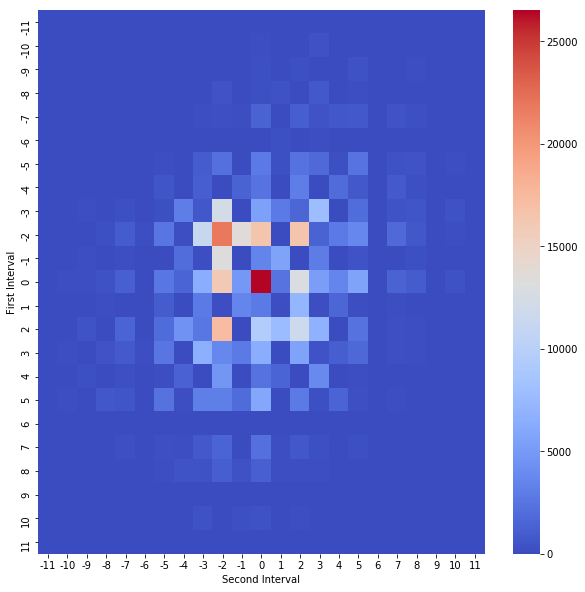

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df, cmap='coolwarm')
plt.xlabel('Second Interval')
plt.ylabel('First Interval')
plt.show()

In [20]:
freqs = df.div(df.sum(axis=1), axis=0)

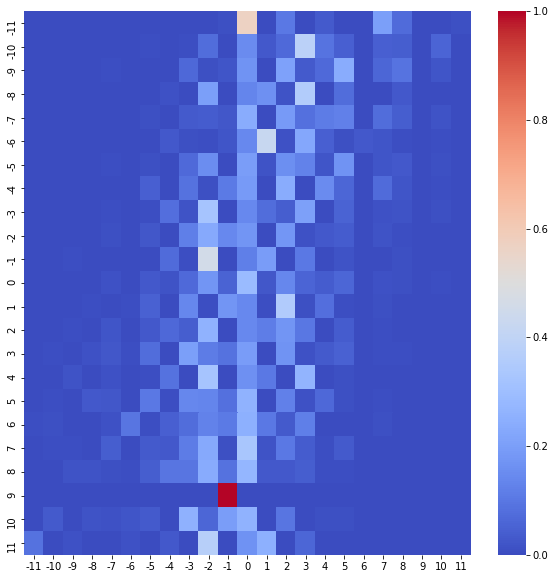

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(freqs, cmap='coolwarm')
plt.show()

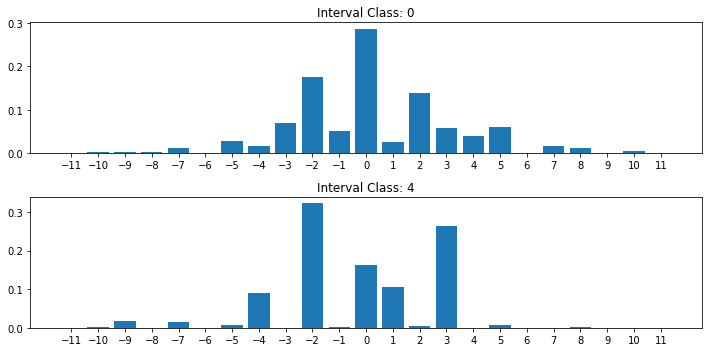

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10,5))

for ax, i in zip(axes, [0,4]):
    marginal = freqs.loc[i,:]
    ax.bar(np.arange(-11,12), marginal )
    ax.set_title(f'Interval Class: {i}')
    ax.set_xticks(np.arange(-11,12))

plt.tight_layout()
plt.show();

We observe that the first distribution is more even. We are less certain about which intervals follow interval class 0 (the unison). We want a measure to quantify this intuition.

## Bayesian Probability: A measure of uncertainty

We adopt the terminology proposed in [*Model-Based Machine Learning*](http://www.mbmlbook.com/index.html) by John Winn and Christopher Bishop with Thomas Diethe.

- **Probability.** A measure of uncertainty which lies between 0 and 1, where 0 means impossible and 1 means certain.
- **Random variable.** A variable whose value we are uncertain about. For example the interval class that is playes after an ascending forth.
- The probability of a random variable $X$ has value $x$ is denoted by $P(X=x)$. For example $P(\text{next interval}=\text{descending minor second}) = 0.1$.
- **Probability distribution.** A function which gives the probability for every possible value of a random variable. Written as $P(X)$ for a random variable $X$
- **Conditional probability distribution.** A probability distribution over some random variable $X$ which changes its value depending on some other variable $Y$, written as $P(X|Y)$. For example $P(\text{next interval } | \text{ ascending fifth})$.
- **Independence.** Two random variables $X$ and $Y$ are independent if $P(X|Y)=P(X)$ and $P(Y|X)=P(Y)$.


## Information content (a.k.a. surprisal)
### Definition

We want to define the **information content** $I(x)$ of a value $x$ of a random variable $X$ now. The information content models how much I learn by the value $x$. It should thus satisfy the following properties:
1. $I(\text{anything that is already known}) = 0$. This is, if $P(X=x)=1$ then $I(x)=0$
2. If $X$ and $Y$ are independent random variables, then $I(x \text{ and } y) = I(x) + I(y)$
3. If $x_1$ is more probable than $x_2$, then I learn less from $x_1$ than from $x_2$. This is if $P(X=x_1)>P(X=x_2)$, then $I(x_1)<I(x_2)$.

The third property is satisfied by taking the reciprocal probability. The first and the second property are satisfied by taking the logarithm of the reciprocal probability,

$$I(x) = \log_2\left(\frac{1}{P(X=x)}\right)$$

### A made-up example by the TAs:

In [70]:
exdf = pd.DataFrame( # example data frame
    {"next_interval": ["second", "third", "fourth", "fifth"], 
     "prob_after_unison": [.25, .25, .25, .25],
     "information_after_unison": [2, 2, 2, 2],
     "prob_after_fifth": [.5, .25, .125, .125],
     "information_after_fifth": [1, 2, 3, 3]},
    columns = ["next_interval", "prob_after_unison", "information_after_unison",
               "prob_after_fifth", "information_after_fifth"]
)
exdf

,next_interval,prob_after_unison,information_after_unison,prob_after_fifth,information_after_fifth
0,second,0.25,2,0.500,1
1,third,0.25,2,0.250,2
2,fourth,0.25,2,0.125,3
3,fifth,0.25,2,0.125,3


## Entropy
The expected information content is called *Entropy*,

$$H(X) = \mathbb E[I] = \sum_{x} P(X=x)~I(x) = \sum_{x} P(X=x)\log_2\left(\frac{1}{P(X=x)}\right)$$

For example, the expected information content of the intervals second, third, fourth, and fifth after a unison is

$$H(\text{interval_after_unison}) = \frac{1}{4}2 + \frac{1}{4}2 + \frac{1}{4}2 + \frac{1}{4}2 = \frac{4}{4}2 = 2.$$

For the distribution of intervals after a fifth (in the made-up example!) it is

$$H(\text{interval_after_fifth}) = \frac{1}{2}1 + \frac{1}{4}2 + \frac{1}{8}3 + \frac{1}{8}3 = 1 + \frac{3}{4} = 1.75.$$

Note that the entropy is always highest for uniform distributions. Intuition: I'm always surprised by eveything, I cannot make valid predictions.

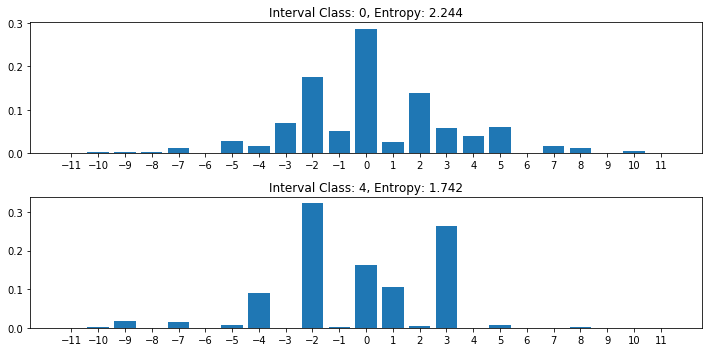

In [81]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10,5))

entropies = []

for ax, i in zip(axes, [0,4]):
    marginal = freqs.loc[i,:]
    e = round(scipy.stats.entropy(marginal),3)
    entropies.append(e)
    ax.bar(np.arange(-11,12), marginal )
    ax.set_title(f'Interval Class: {i}, Entropy: {e}')
    ax.set_xticks(np.arange(-11,12))

plt.tight_layout()
plt.show();

## Cross-Entropy
From [wikipedia](https://en.wikipedia.org/wiki/Cross_entropy): *In information theory, the cross entropy between two probability distributions p and q over the same underlying set of events measures the average number of bits needed to identify an event drawn from the set, if a coding scheme is used that is optimized for an "unnatural" probability distribution q, rather than the "true" distribution p.*

In math, this is

$$H(X, Y) = \mathbb E_X[I_Y] = \sum_{x} P(X=x)~I_Y(x) = \sum_x P(X=x)~\log_2\left(\frac{1}{P(Y=x)}\right).$$

In the made up example:

$$H(\text{interval_after_unison } | \text{ interval_after_fifth}) = \frac{1}{4}1 + \frac{1}{4}2 + \frac{1}{4}3 + \frac{1}{4}3 = \frac{9}{4} = 2.25$$

$$H(\text{interval_after_fifth } | \text{ interval_after_unison}) = \frac{1}{2}2 + \frac{1}{4}2 + \frac{1}{8}2 + \frac{1}{8}2 = 2$$

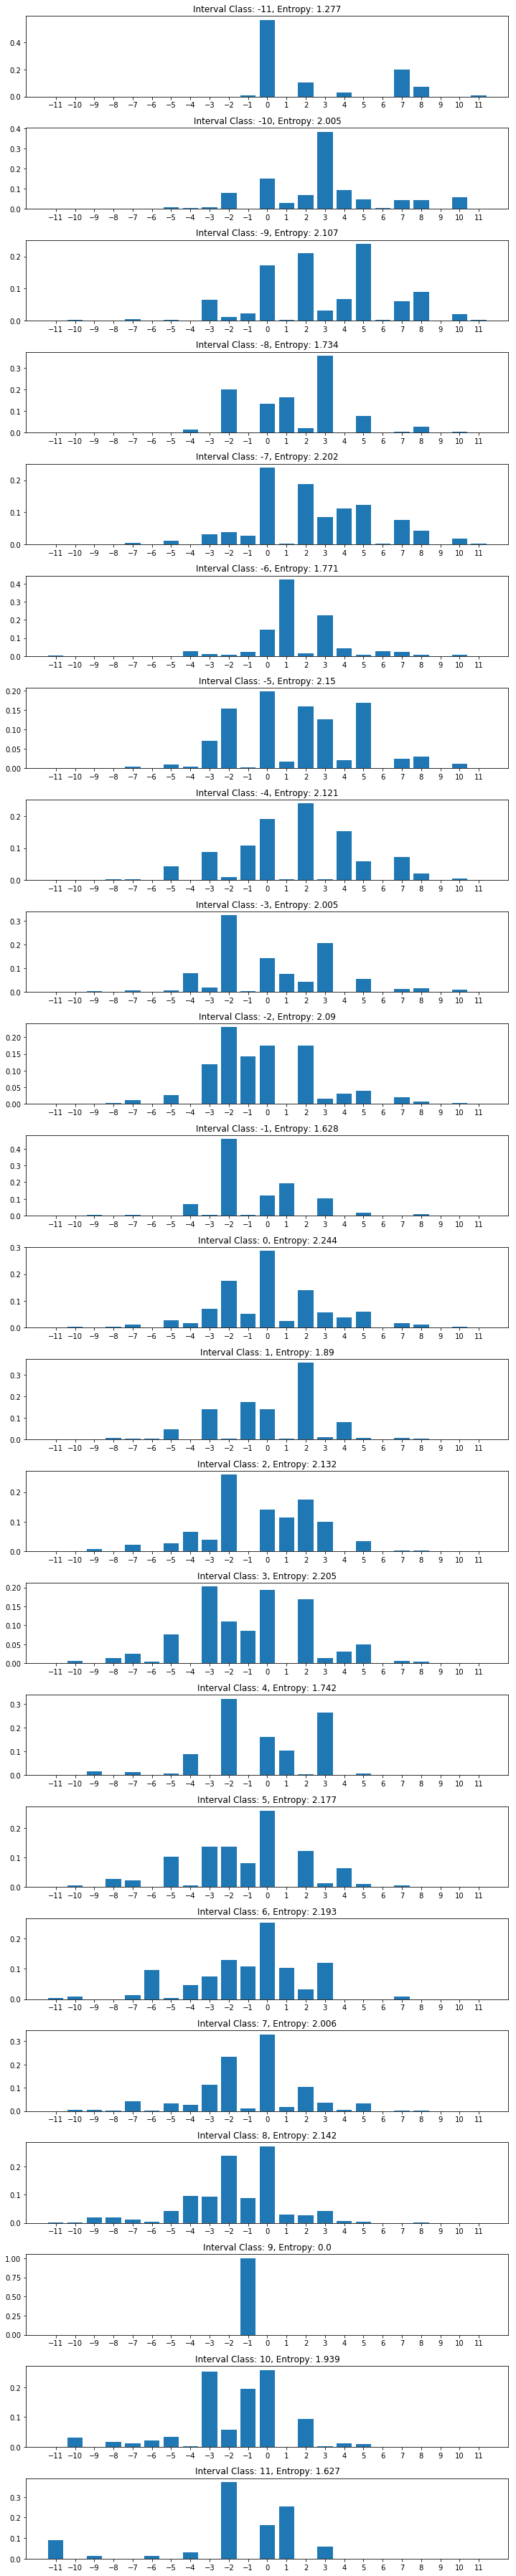

In [63]:
fig, axes = plt.subplots(nrows=23, ncols=1,figsize=(10,50))

entropies = []

for ax, i in zip(axes, range(-11,12)):
    marginal = freqs.loc[i,:]
    e = round(scipy.stats.entropy(marginal),3)
    entropies.append(e)
    ax.bar(np.arange(-11,12), marginal )
    ax.set_title(f'Interval Class: {i}, Entropy: {e}')
    ax.set_xticks(np.arange(-11,12))

plt.tight_layout()
plt.show();

In [69]:
# examples: unison and ascending major third

In [53]:
cross_entropies = [ scipy.stats.entropy(freqs.loc[i,:], freqs.loc[j,:]) for (i, j) in [(2,7), (7,2)] ]

In [55]:
cross_entropies

[inf, 0.30714823018050197]